<a href="https://colab.research.google.com/github/Vaishnavimore10/Credit_capacity_of_consumer/blob/main/open_ended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML5.csv")

In [ ]:
data.shape
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,sex,FLAG_OWN_CAR,Unnamed: 7,Can_buy_Laptop
0,6862,1971,Graduation,Divorced,1730.0,Female,Y,NaN,N
1,5376,1979,Graduation,Married,2447.0,Female,N,NaN,N
2,11110,1973,Graduation,Single,3502.0,Male,Y,NaN,N
3,9931,1963,PhD,Married,4023.0,Male,N,NaN,N
4,10311,1969,Graduation,Married,4428.0,Male,N,NaN,N
5,3955,1965,Graduation,Divorced,4861.0,Male,N,NaN,N
6,9303,1976,Graduation,Married,5305.0,Male,N,NaN,N
7,5899,1950,PhD,Together,5648.0,Male,N,NaN,N
8,4246,1982,Master,Single,6560.0,Male,Y,NaN,N
9,4303,1957,PhD,Together,6835.0,Male,N,NaN,N


In [ ]:
plt.scatter(data.Income,data.Can_buy_Laptop)

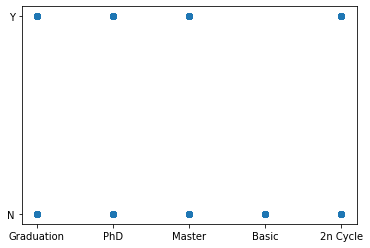

In [ ]:
plt.scatter(data.Education,data.Can_buy_Laptop)

In [ ]:
data.drop(data[data['Income'] >= 300000].index, inplace = True)

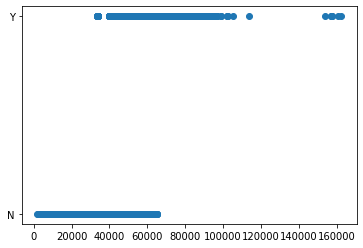

In [ ]:
plt.scatter(data.Income,data.Can_buy_Laptop)

In [ ]:
data.drop(data[data['Income'] >= 120000 ].index, inplace = True)

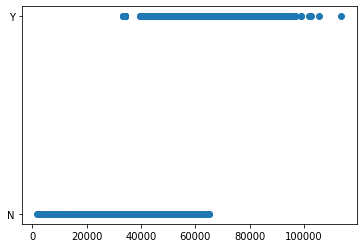

In [ ]:
plt.scatter(data.Income,data.Can_buy_Laptop)

In [ ]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
data.shape
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,sex,FLAG_OWN_CAR,Can_buy_Laptop
0,6862,1971,Graduation,Divorced,1730.0,Female,Y,N
1,5376,1979,Graduation,Married,2447.0,Female,N,N
2,11110,1973,Graduation,Single,3502.0,Male,Y,N
3,9931,1963,PhD,Married,4023.0,Male,N,N
4,10311,1969,Graduation,Married,4428.0,Male,N,N


In [ ]:
data.dropna() 

,ID,Year_Birth,Education,Marital_Status,Income,sex,FLAG_OWN_CAR,Can_buy_Laptop
0,6862,1971,Graduation,Divorced,1730.0,Female,Y,N
1,5376,1979,Graduation,Married,2447.0,Female,N,N
2,11110,1973,Graduation,Single,3502.0,Male,Y,N
3,9931,1963,PhD,Married,4023.0,Male,N,N
4,10311,1969,Graduation,Married,4428.0,Male,N,N
...,...,...,...,...,...,...,...,...
2203,7215,1983,Graduation,Single,101970.0,Male,N,Y
2204,2798,1977,PhD,Together,102160.0,Female,N,Y
2205,10089,1974,Graduation,Divorced,102692.0,Male,Y,Y
2206,4611,1970,Graduation,Together,105471.0,Female,Y,Y


In [ ]:
data['Can_buy_Laptop'] = data['Can_buy_Laptop'].replace(['Y','N'],[1,0])

In [ ]:
df = data.dropna()
print(df)

         ID  Year_Birth   Education Marital_Status    Income     sex  \
0      6862        1971  Graduation       Divorced    1730.0  Female   
1      5376        1979  Graduation        Married    2447.0  Female   
2     11110        1973  Graduation         Single    3502.0    Male   
3      9931        1963         PhD        Married    4023.0    Male   
4     10311        1969  Graduation        Married    4428.0    Male   
...     ...         ...         ...            ...       ...     ...   
2203   7215        1983  Graduation         Single  101970.0    Male   
2204   2798        1977         PhD       Together  102160.0  Female   
2205  10089        1974  Graduation       Divorced  102692.0    Male   
2206   4611        1970  Graduation       Together  105471.0  Female   
2207   4619        1945         PhD         Single  113734.0    Male   

     FLAG_OWN_CAR  Can_buy_Laptop  
0               Y               0  
1               N               0  
2               Y          

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df[['Income']]
y = df['Can_buy_Laptop']
x_train,x_test,y_train,y_test=train_test_split(x,y,
train_size=0.7,
test_size=0.3,
random_state=0)

In [ ]:
print(y_test)

648     0
810     0
1546    1
399     0
1197    1
       ..
122     0
1673    1
214     0
921     0
1422    0
Name: Can_buy_Laptop, Length: 663, dtype: int64


In [ ]:
reg = LogisticRegression()
reg.fit(x_train, y_train)
Y_pred = reg.predict(x_test)
print(Y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
reg.score(x_train,y_train)

0.5203883495145631

100